In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('/Users/agorina/Desktop/Projects/Good_Apple/GoodApple_DemoData_c.csv')
df.head()

Date   Month Channel 1 Views Channel 1 Interactions Channel 2 Views  \
0  1/1/14  2014-1           8,000                    300       7,500,000   
1  1/2/14  2014-1          13,000                    700       7,600,000   
2  1/3/14  2014-1          47,000                  2,000       7,800,000   
3  1/4/14  2014-1          52,000                  1,000       7,600,000   
4  1/5/14  2014-1          60,000                  2,000       7,400,000   

  Channel 2 Interactions Site Visitors  Unnamed: 7      Week  Term 1  Term 2  \
0                 36,000        29,200         NaN  12/30/07    16.0    16.0   
1                 41,000        28,500         NaN    1/6/08    24.0    17.0   
2                 39,000        27,000         NaN   1/13/08    22.0    34.0   
3                 35,000        22,100         NaN   1/20/08    30.0    23.0   
4                 41,000        22,400         NaN   1/27/08    22.0    15.0   

   Term 3  Unnamed: 12  Unnamed: 13  Unnamed: 14  Unnamed: 15  Unnamed: 16  \
0    47.0          NaN          NaN          NaN          NaN          NaN   
1    64.0          NaN          NaN          NaN          NaN          NaN   
2    64.0          NaN          NaN          NaN          NaN          NaN   
3    63.0          NaN          NaN          NaN          NaN          NaN   
4    63.0          NaN          NaN          NaN          NaN          NaN   

   Unnamed: 17  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN

In [7]:
df1 = df[['Date', 'Month', 'Channel 1 Views', 'Channel 1 Interactions', 'Channel 2 Views', 'Channel 2 Interactions', 'Site Visitors']]
df2 = df[['Week', 'Term 1', 'Term 2', 'Term 3']]

In [8]:
df1.head()

Date   Month Channel 1 Views Channel 1 Interactions Channel 2 Views  \
0  1/1/14  2014-1           8,000                    300       7,500,000   
1  1/2/14  2014-1          13,000                    700       7,600,000   
2  1/3/14  2014-1          47,000                  2,000       7,800,000   
3  1/4/14  2014-1          52,000                  1,000       7,600,000   
4  1/5/14  2014-1          60,000                  2,000       7,400,000   

  Channel 2 Interactions Site Visitors  
0                 36,000        29,200  
1                 41,000        28,500  
2                 39,000        27,000  
3                 35,000        22,100  
4                 41,000        22,400

In [9]:
df2.head()

Week  Term 1  Term 2  Term 3
0  12/30/07    16.0    16.0    47.0
1    1/6/08    24.0    17.0    64.0
2   1/13/08    22.0    34.0    64.0
3   1/20/08    30.0    23.0    63.0
4   1/27/08    22.0    15.0    63.0

In [10]:
print(df1.dtypes)
print(df2.dtypes)

Date                      object
Month                     object
Channel 1 Views           object
Channel 1 Interactions    object
Channel 2 Views           object
Channel 2 Interactions    object
Site Visitors             object
dtype: object
Week       object
Term 1    float64
Term 2    float64
Term 3    float64
dtype: object


In [11]:
df1['Channel 1 Views'] = df1['Channel 1 Views'].replace(to_replace=',', value='', regex=True)
df1['Channel 1 Views'] = df1['Channel 1 Views'].astype(float)

In [12]:
def converting(df, colname, toreplace, value):
    df[colname] = df[colname].replace(to_replace=toreplace, value=value, regex=True)
    df[colname] = df[colname].astype(float)
    
    return df.head()

In [13]:
converting(df1, 'Channel 2 Views', ',', '')

Date   Month  Channel 1 Views Channel 1 Interactions  Channel 2 Views  \
0  1/1/14  2014-1           8000.0                    300        7500000.0   
1  1/2/14  2014-1          13000.0                    700        7600000.0   
2  1/3/14  2014-1          47000.0                  2,000        7800000.0   
3  1/4/14  2014-1          52000.0                  1,000        7600000.0   
4  1/5/14  2014-1          60000.0                  2,000        7400000.0   

  Channel 2 Interactions Site Visitors  
0                 36,000        29,200  
1                 41,000        28,500  
2                 39,000        27,000  
3                 35,000        22,100  
4                 41,000        22,400

In [14]:
converting(df1, 'Channel 1 Interactions', ',', '')

Date   Month  Channel 1 Views  Channel 1 Interactions  Channel 2 Views  \
0  1/1/14  2014-1           8000.0                   300.0        7500000.0   
1  1/2/14  2014-1          13000.0                   700.0        7600000.0   
2  1/3/14  2014-1          47000.0                  2000.0        7800000.0   
3  1/4/14  2014-1          52000.0                  1000.0        7600000.0   
4  1/5/14  2014-1          60000.0                  2000.0        7400000.0   

  Channel 2 Interactions Site Visitors  
0                 36,000        29,200  
1                 41,000        28,500  
2                 39,000        27,000  
3                 35,000        22,100  
4                 41,000        22,400

In [15]:
converting(df1, 'Channel 2 Interactions', ',', '')

Date   Month  Channel 1 Views  Channel 1 Interactions  Channel 2 Views  \
0  1/1/14  2014-1           8000.0                   300.0        7500000.0   
1  1/2/14  2014-1          13000.0                   700.0        7600000.0   
2  1/3/14  2014-1          47000.0                  2000.0        7800000.0   
3  1/4/14  2014-1          52000.0                  1000.0        7600000.0   
4  1/5/14  2014-1          60000.0                  2000.0        7400000.0   

   Channel 2 Interactions Site Visitors  
0                 36000.0        29,200  
1                 41000.0        28,500  
2                 39000.0        27,000  
3                 35000.0        22,100  
4                 41000.0        22,400

In [16]:
converting(df1, 'Site Visitors',  ',', '')

Date   Month  Channel 1 Views  Channel 1 Interactions  Channel 2 Views  \
0  1/1/14  2014-1           8000.0                   300.0        7500000.0   
1  1/2/14  2014-1          13000.0                   700.0        7600000.0   
2  1/3/14  2014-1          47000.0                  2000.0        7800000.0   
3  1/4/14  2014-1          52000.0                  1000.0        7600000.0   
4  1/5/14  2014-1          60000.0                  2000.0        7400000.0   

   Channel 2 Interactions  Site Visitors  
0                 36000.0        29200.0  
1                 41000.0        28500.0  
2                 39000.0        27000.0  
3                 35000.0        22100.0  
4                 41000.0        22400.0

In [17]:
df1.dtypes

Date                       object
Month                      object
Channel 1 Views           float64
Channel 1 Interactions    float64
Channel 2 Views           float64
Channel 2 Interactions    float64
Site Visitors             float64
dtype: object

In [18]:
from scipy.stats import linregress, pearsonr

In [19]:
def regression(x, y, color):
    reg = linregress(x, y)
    corr, _ = pearsonr(x, y)
    if corr > 0:
        print('Positive correlation')
    elif corr < 0:
        print('Negative correlation')
    else:
        print('No correlation')
    print('Pearsons correlation: %.3f' % corr)
    print(reg)
    sns.regplot(x, y, color=color)

In [20]:
df1['Channel 1 Views'].isna().sum()

65

In [21]:
df1.dropna(how='any', inplace=True)

In [22]:
df1.isna().sum()

Date                      0
Month                     0
Channel 1 Views           0
Channel 1 Interactions    0
Channel 2 Views           0
Channel 2 Interactions    0
Site Visitors             0
dtype: int64

Positive correlation
Pearsons correlation: 0.872
LinregressResult(slope=0.006273346927107752, intercept=3571.392816254866, rvalue=0.8719278881896727, pvalue=7.6470228056591095e-171, stderr=0.00015103970532345126)


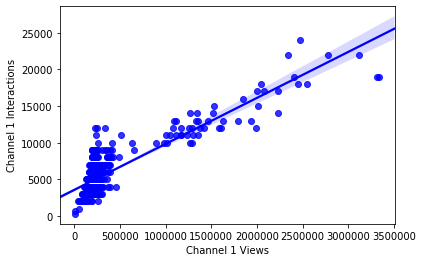

In [23]:
regression(df1['Channel 1 Views'], df1['Channel 1 Interactions'], 'blue')

Positive correlation
Pearsons correlation: 0.831
LinregressResult(slope=0.0033088987371489805, intercept=25339.04668287591, rvalue=0.8308859940990743, pvalue=1.3266696497728396e-140, stderr=9.500862396718645e-05)


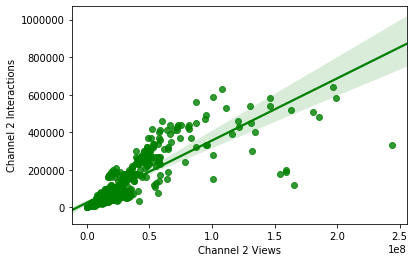

In [24]:
regression(df1['Channel 2 Views'], df1['Channel 2 Interactions'], 'green')

In [25]:
from statsmodels.formula.api import ols

In [26]:
#df = df.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'})

df1 = df1.rename(columns={'Channel 1 Views': 'Channel_1_Views', 
                          'Channel 1 Interactions': 'Channel_1_Interactions',
                         'Channel 2 Views': 'Channel_2_Views',
                         'Channel 2 Interactions': 'Channel_2_Interactions',
                         'Site Visitors': 'Site_Visitors'})
df1.head()

Date   Month  Channel_1_Views  Channel_1_Interactions  Channel_2_Views  \
0  1/1/14  2014-1           8000.0                   300.0        7500000.0   
1  1/2/14  2014-1          13000.0                   700.0        7600000.0   
2  1/3/14  2014-1          47000.0                  2000.0        7800000.0   
3  1/4/14  2014-1          52000.0                  1000.0        7600000.0   
4  1/5/14  2014-1          60000.0                  2000.0        7400000.0   

   Channel_2_Interactions  Site_Visitors  
0                 36000.0        29200.0  
1                 41000.0        28500.0  
2                 39000.0        27000.0  
3                 35000.0        22100.0  
4                 41000.0        22400.0

In [27]:
# Channel 1 Views           float64
# Channel 1 Interactions    float64
# Channel 2 Views           float64
# Channel 2 Interactions    float64
# Site Visitors             float64

model = ols(formula="Site_Visitors~Channel_1_Views+Channel_1_Interactions+Channel_2_Views+Channel_2_Interactions", data=df1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Site_Visitors   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     3329.
Date:                Wed, 08 Apr 2020   Prob (F-statistic):               0.00
Time:                        16:22:18   Log-Likelihood:                -5944.8
No. Observations:                 546   AIC:                         1.190e+04
Df Residuals:                     541   BIC:                         1.192e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               -319.8693   1391.167     -0.230      0.818   -3052.620    2412.881
Channel_1_Views           -0.0031      0.002     -1.279      0.201      -0.008       0.002
Channel_1_Interactions     1.5727      0.377      4.175      0.000       0.833       2.313
Channel_2_Views          8.25e-06   3.07e-05      0.268      0.788   -5.21e-05    6.86e-05
Channel_2_Interactions     0.4728      0.008     57.064      0.000       0.457       0.489
==============================================================================
Omnibus:                       72.241   Durbin-Watson:                   0.432
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              599.891
Skew:                          -0.187   Prob(JB):                    5.44e-131
Kurtosis:                       8.121   Cond. No.                     1.08e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
correlation = df1[['Channel_1_Views', 'Channel_1_Interactions', 'Channel_2_Views', 'Channel_2_Interactions']].corr()

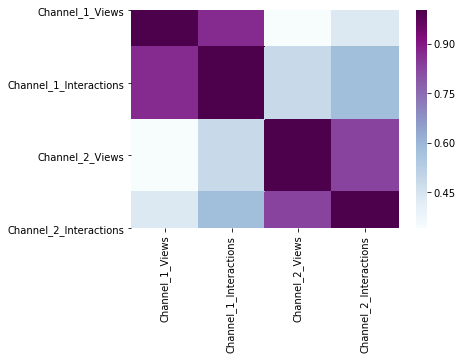

In [29]:
sns.heatmap(correlation, cmap = "BuPu")


In [30]:
model = ols(formula="Site_Visitors~Channel_1_Views+Channel_2_Views", data=df1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Site_Visitors   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     637.0
Date:                Wed, 08 Apr 2020   Prob (F-statistic):          3.79e-143
Time:                        16:22:32   Log-Likelihood:                -6500.4
No. Observations:                 546   AIC:                         1.301e+04
Df Residuals:                     543   BIC:                         1.302e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1.212e+04   2147.885      5.643      0.000    7900.650    1.63e+04
Channel_1_Views     0.0282      0.003      8.148      0.000       0.021       0.035
Channel_2_Views     0.0015   5.01e-05     29.876      0.000       0.001       0.002
==============================================================================
Omnibus:                      162.483   Durbin-Watson:                   0.880
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2890.200
Skew:                          -0.811   Prob(JB):                         0.00
Kurtosis:                      14.154   Cond. No.                     6.03e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.03e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
model = ols(formula="Site_Visitors~Channel_1_Interactions+Channel_2_Interactions", data=df1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Site_Visitors   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     6661.
Date:                Wed, 08 Apr 2020   Prob (F-statistic):               0.00
Time:                        16:22:36   Log-Likelihood:                -5945.7
No. Observations:                 546   AIC:                         1.190e+04
Df Residuals:                     543   BIC:                         1.191e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                820.0368   1087.580      0.754      0.451   -1316.342    2956.415
Channel_1_Interactions     1.1654      0.201      5.796      0.000       0.770       1.560
Channel_2_Interactions     0.4757      0.005     90.461      0.000       0.465       0.486
==============================================================================
Omnibus:                       70.543   Durbin-Watson:                   0.436
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              621.471
Skew:                          -0.071   Prob(JB):                    1.12e-135
Kurtosis:                       8.225   Cond. No.                     3.44e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.44e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
def plot_dist(df, colname, var, color, title):
    var = df[colname].value_counts()
    sns.set_style('darkgrid')
    plt.figure(figsize = (10,5))
    var.plot.bar(rot=45, color=color)
    plt.title(title)
    plt.show()

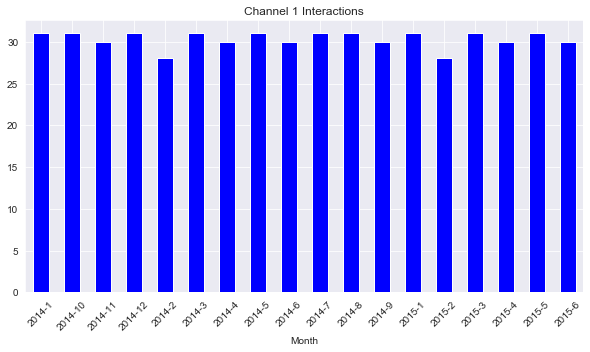

In [33]:
sns.set_style('darkgrid')
plt.figure(figsize = (10,5))
ch1_by_month = df1.groupby('Month')['Channel_1_Interactions'].count()
ch1_by_month.plot.bar(rot=45, color='blue')
plt.title('Channel 1 Interactions')

plt.show()

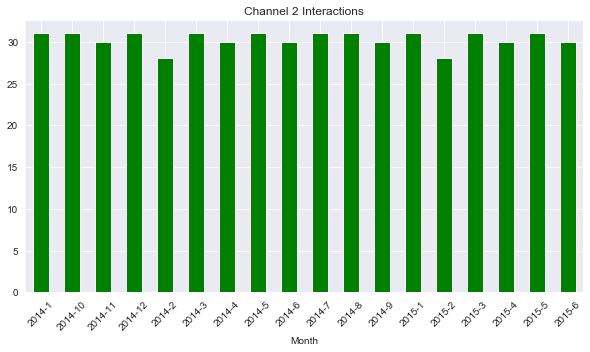

In [34]:
sns.set_style('darkgrid')
plt.figure(figsize = (10,5))
ch2_by_month = df1.groupby('Month')['Channel_2_Interactions'].count()
ch2_by_month.plot.bar(rot=45, color='green')
plt.title('Channel 2 Interactions')

plt.show()

In [35]:
import plotly.express as px

In [36]:
fig = px.bar(df1, x="Month", y="Channel_1_Interactions", barmode='group',
             height=400)
fig.show()

In [37]:
fig = px.bar(df1, x="Month", y="Channel_2_Interactions", barmode='group',
             height=400)
fig.show()

In [38]:
fig = px.bar(df1, x="Month", y="Channel_1_Views", barmode='group',
             height=400)
fig.show()

In [39]:
fig = px.bar(df1, x="Month", y="Channel_2_Views", barmode='group',
             height=400)
fig.show()

In [40]:
fig = px.bar(df1, x="Month", y="Site_Visitors", barmode='group',
             height=400)
fig.show()

In [41]:
df2.head()

Week  Term 1  Term 2  Term 3
0  12/30/07    16.0    16.0    47.0
1    1/6/08    24.0    17.0    64.0
2   1/13/08    22.0    34.0    64.0
3   1/20/08    30.0    23.0    63.0
4   1/27/08    22.0    15.0    63.0

In [42]:
fig = px.bar(df2, x="Week", y="Term 1", barmode='group',
             height=400)
fig.show()

In [43]:
fig = px.bar(df2, x="Week", y="Term 2", barmode='group',
             height=400)
fig.show()

In [44]:
fig = px.bar(df2, x="Week", y="Term 3", barmode='group',
             height=400)
fig.show()

In [45]:
pd.to_datetime(df2['Week'])


0     2007-12-30
1     2008-01-06
2     2008-01-13
3     2008-01-20
4     2008-01-27
         ...    
606          NaT
607          NaT
608          NaT
609          NaT
610          NaT
Name: Week, Length: 611, dtype: datetime64[ns]

In [46]:
df1.describe()

Channel_1_Views  Channel_1_Interactions  Channel_2_Views  \
count     5.460000e+02              546.000000     5.460000e+02   
mean      3.398352e+05             5703.296703     2.824711e+07   
std       4.732124e+05             3404.668696     3.268654e+07   
min       8.000000e+03              300.000000     3.300000e+05   
25%       1.600000e+05             4000.000000     8.025000e+06   
50%       2.000000e+05             5000.000000     1.635000e+07   
75%       2.600000e+05             7000.000000     3.545000e+07   
max       3.340000e+06            24000.000000     2.436000e+08   

       Channel_2_Interactions  Site_Visitors  
count              546.000000     546.000000  
mean            118805.860806   63986.080586  
std             130170.018823   65609.444026  
min               1000.000000    5200.000000  
25%              26000.000000   18825.000000  
50%              57500.000000   30050.000000  
75%             170000.000000   85800.000000  
max             640000.000000  327000.000000

In [47]:
df2.describe()

Term 1      Term 2      Term 3
count  395.000000  395.000000  395.000000
mean    56.283544   27.941772   61.463291
std     19.042715   12.364972    8.038015
min     16.000000   10.000000   33.000000
25%     39.000000   21.000000   56.500000
50%     58.000000   25.000000   63.000000
75%     73.000000   31.000000   67.000000
max    100.000000  100.000000   83.000000

In [48]:
import datetime
import math
import time
from fbprophet import Prophet
from matplotlib.pylab import rcParams

In [62]:
df2_1 = df2[['Week', 'Term 1']]
df2_2 = df2[['Week', 'Term 2']]
df2_3 = df2[['Week', 'Term 3']]
df2_1.head()

Week  Term 1
0  12/30/07    16.0
1    1/6/08    24.0
2   1/13/08    22.0
3   1/20/08    30.0
4   1/27/08    22.0

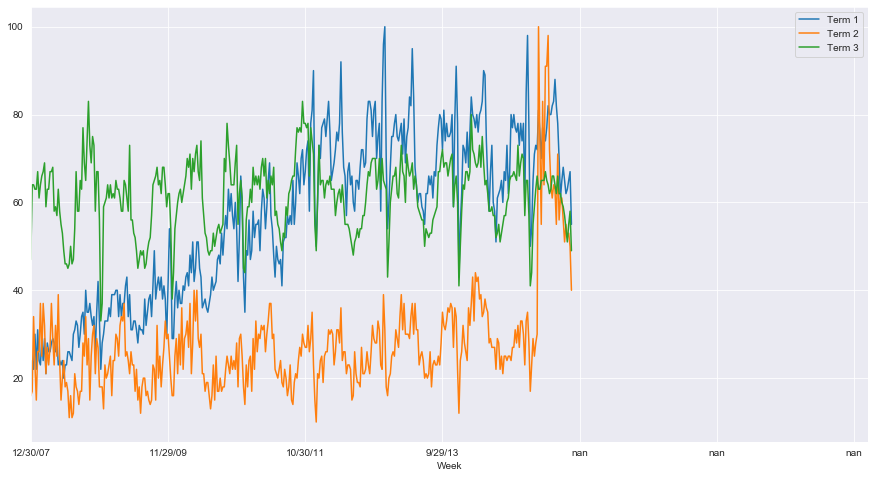

In [51]:
pd.plotting.register_matplotlib_converters()
ax = df2.set_index('Week').plot(figsize=(15, 8))
ax.set_xlabel('Week')

plt.show()

In [55]:
df2.dropna(how='all', inplace=True)

In [56]:
df2.isna().sum()

Week      0
Term 1    0
Term 2    0
Term 3    0
dtype: int64

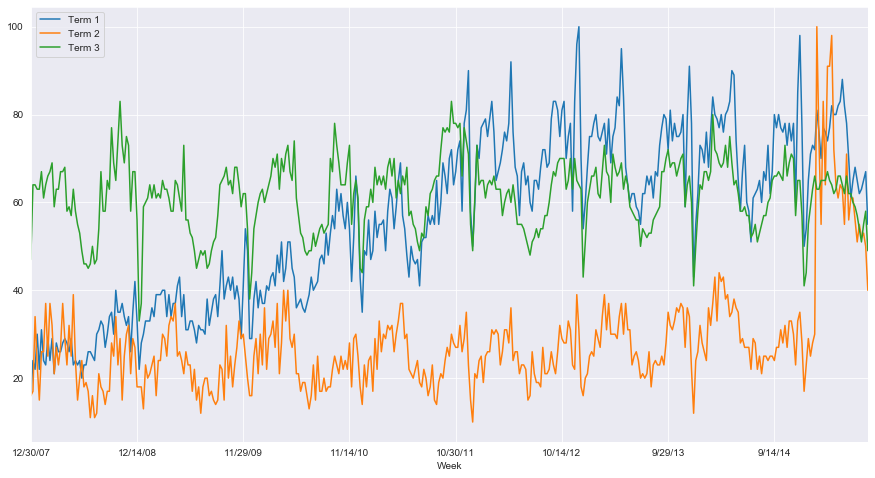

In [57]:
pd.plotting.register_matplotlib_converters()
ax = df2.set_index('Week').plot(figsize=(15, 8))
ax.set_xlabel('Week')

plt.show()

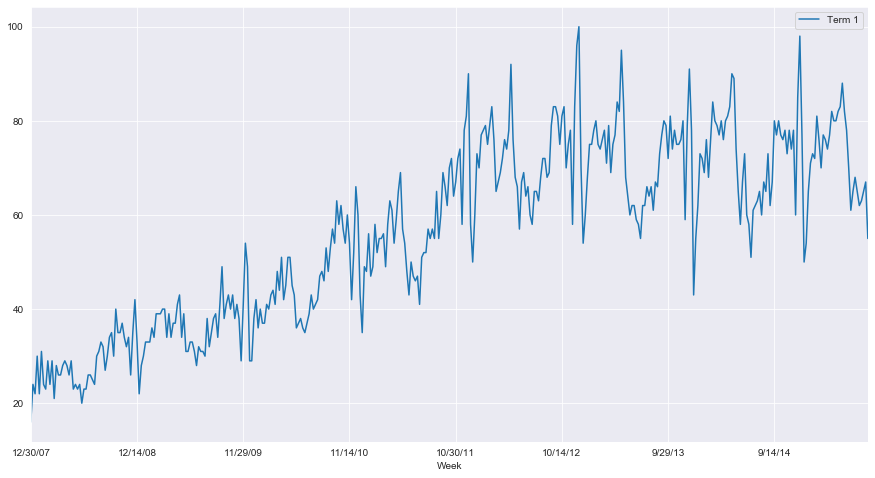

In [59]:
pd.plotting.register_matplotlib_converters()
ax1 = df2_1.set_index('Week').plot(figsize=(15, 8))
ax1.set_xlabel('Week')

plt.show()

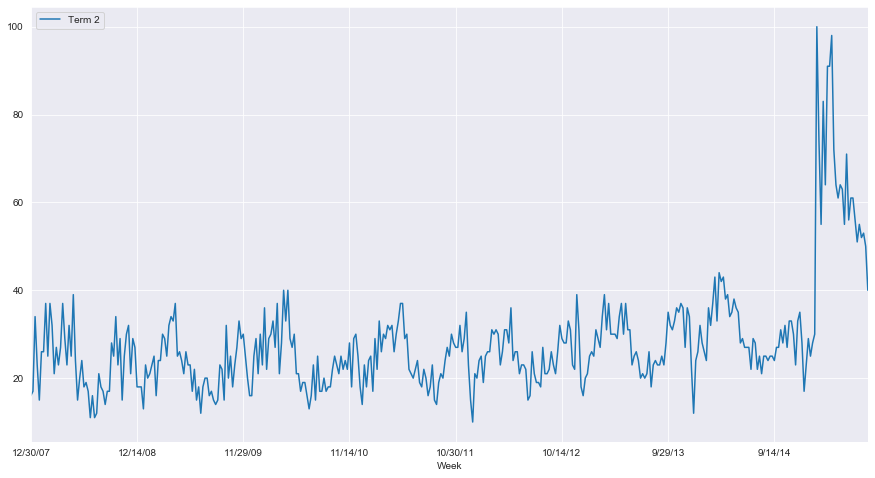

In [60]:
pd.plotting.register_matplotlib_converters()
ax2 = df2_2.set_index('Week').plot(figsize=(15, 8))
ax2.set_xlabel('Week')

plt.show()

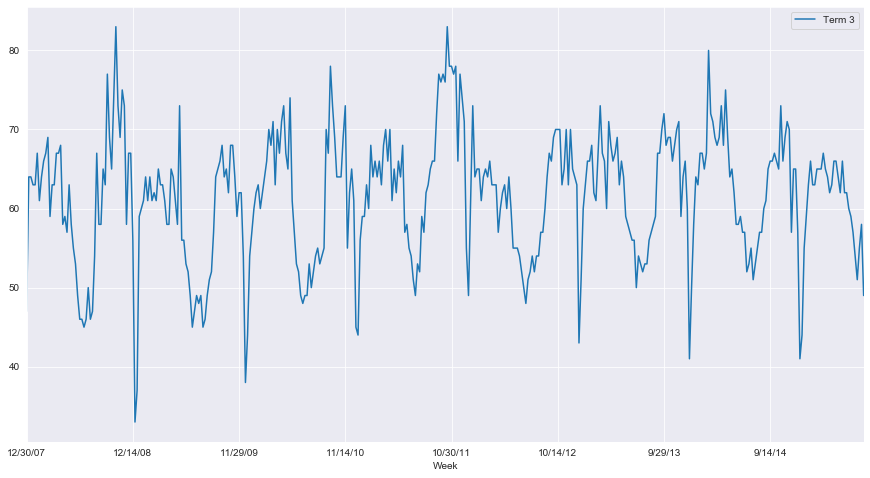

In [63]:
pd.plotting.register_matplotlib_converters()
ax3 = df2_3.set_index('Week').plot(figsize=(15, 8))
ax3.set_xlabel('Week')

plt.show()

In [69]:
df2_1= df2_1.rename(columns={'Week': 'ds', 'Term 1': 'y'})
train_1 = df2_1[:int(0.9*(len(df2_1)))]
test_1 = df2_1[int(0.9*(len(df2_1))):]

In [70]:
prophet = Prophet(interval_width=0.95)
prophet.fit(train_1)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [71]:
future = prophet.make_future_dataframe(periods=(365), freq='D')
future.tail()

ds
715 2015-10-08
716 2015-10-09
717 2015-10-10
718 2015-10-11
719 2015-10-12

In [72]:
forecast = prophet.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds       yhat  yhat_lower  yhat_upper
715 2015-10-08  74.361806   63.972003   84.586641
716 2015-10-09  74.200444   64.732959   84.400371
717 2015-10-10  74.108851   64.447600   84.303440
718 2015-10-11  74.090100   64.571759   84.034907
719 2015-10-12  74.144726   63.870325   83.932482

In [74]:
search_interest = prophet.make_future_dataframe(periods=len(test_1))
forecast = prophet.predict(search_interest)

In [75]:
from sklearn.metrics import mean_squared_error

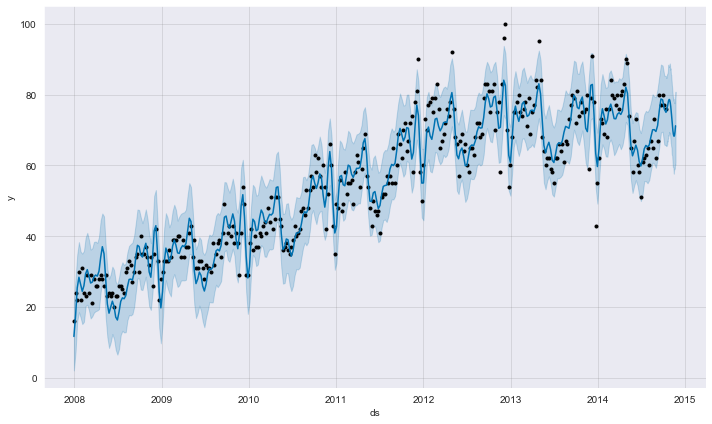

In [80]:
fig1 = prophet.plot(forecast)

In [82]:
df2_2= df2_2.rename(columns={'Week': 'ds', 'Term 2': 'y'})
train_2 = df2_2[:int(0.9*(len(df2_2)))]
test_2 = df2_2[int(0.9*(len(df2_2))):]

In [83]:
prophet = Prophet(interval_width=0.95)
prophet.fit(train_2)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [84]:
future2 = prophet.make_future_dataframe(periods=(365), freq='D')
future2.tail()

ds
715 2015-10-08
716 2015-10-09
717 2015-10-10
718 2015-10-11
719 2015-10-12

In [85]:
forecast2 = prophet.predict(future2)
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds       yhat  yhat_lower  yhat_upper
715 2015-10-08  34.550776   26.762083   42.406204
716 2015-10-09  34.580477   26.515125   41.948664
717 2015-10-10  34.604459   26.412146   42.433466
718 2015-10-11  34.624428   26.274880   42.101036
719 2015-10-12  34.641876   26.490319   41.935152

In [86]:
search_interest2 = prophet.make_future_dataframe(periods=len(test_2))
forecast2 = prophet.predict(search_interest2)

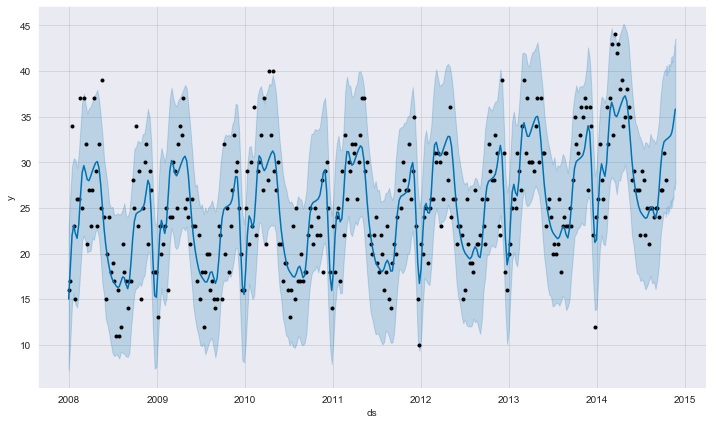

In [87]:
fig2 = prophet.plot(forecast2)

In [88]:
df2_3= df2_3.rename(columns={'Week': 'ds', 'Term 3': 'y'})
train_3 = df2_3[:int(0.9*(len(df2_3)))]
test_3 = df2_3[int(0.9*(len(df2_3))):]

In [90]:
prophet = Prophet(interval_width=0.95)
prophet.fit(train_3)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [91]:
future3 = prophet.make_future_dataframe(periods=(365), freq='D')
future3.tail()

ds
715 2015-10-08
716 2015-10-09
717 2015-10-10
718 2015-10-11
719 2015-10-12

In [92]:
forecast3 = prophet.predict(future3)
forecast3[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds       yhat  yhat_lower  yhat_upper
715 2015-10-08  70.465900   61.921917   78.909787
716 2015-10-09  70.379757   61.713784   79.103895
717 2015-10-10  70.325390   61.159447   78.764487
718 2015-10-11  70.304697   61.845861   79.084100
719 2015-10-12  70.318345   61.740075   79.255121

In [93]:
search_interest3 = prophet.make_future_dataframe(periods=len(test_3))
forecast3 = prophet.predict(search_interest3)

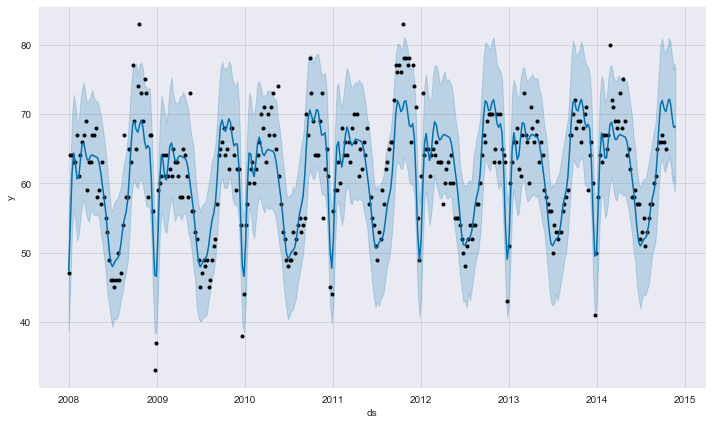

In [94]:
fig3 = prophet.plot(forecast3)

In [95]:
df.head()

Date   Month Channel 1 Views Channel 1 Interactions Channel 2 Views  \
0  1/1/14  2014-1           8,000                    300       7,500,000   
1  1/2/14  2014-1          13,000                    700       7,600,000   
2  1/3/14  2014-1          47,000                  2,000       7,800,000   
3  1/4/14  2014-1          52,000                  1,000       7,600,000   
4  1/5/14  2014-1          60,000                  2,000       7,400,000   

  Channel 2 Interactions Site Visitors  Unnamed: 7      Week  Term 1  Term 2  \
0                 36,000        29,200         NaN  12/30/07    16.0    16.0   
1                 41,000        28,500         NaN    1/6/08    24.0    17.0   
2                 39,000        27,000         NaN   1/13/08    22.0    34.0   
3                 35,000        22,100         NaN   1/20/08    30.0    23.0   
4                 41,000        22,400         NaN   1/27/08    22.0    15.0   

   Term 3  Unnamed: 12  Unnamed: 13  Unnamed: 14  Unnamed: 15  Unnamed: 16  \
0    47.0          NaN          NaN          NaN          NaN          NaN   
1    64.0          NaN          NaN          NaN          NaN          NaN   
2    64.0          NaN          NaN          NaN          NaN          NaN   
3    63.0          NaN          NaN          NaN          NaN          NaN   
4    63.0          NaN          NaN          NaN          NaN          NaN   

   Unnamed: 17  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN

In [96]:
df = df[['Date', 'Week', 'Month', 'Channel 1 Views', 'Channel 1 Interactions', 'Channel 2 Views', 'Channel 2 Interactions', 'Site Visitors', 'Term 1', 'Term 2', 'Term 3']]
df.head()

Date      Week   Month Channel 1 Views Channel 1 Interactions  \
0  1/1/14  12/30/07  2014-1           8,000                    300   
1  1/2/14    1/6/08  2014-1          13,000                    700   
2  1/3/14   1/13/08  2014-1          47,000                  2,000   
3  1/4/14   1/20/08  2014-1          52,000                  1,000   
4  1/5/14   1/27/08  2014-1          60,000                  2,000   

  Channel 2 Views Channel 2 Interactions Site Visitors  Term 1  Term 2  Term 3  
0       7,500,000                 36,000        29,200    16.0    16.0    47.0  
1       7,600,000                 41,000        28,500    24.0    17.0    64.0  
2       7,800,000                 39,000        27,000    22.0    34.0    64.0  
3       7,600,000                 35,000        22,100    30.0    23.0    63.0  
4       7,400,000                 41,000        22,400    22.0    15.0    63.0

In [97]:
df.columns = df.columns.str.replace(' ', '_')
df.head()

Date      Week   Month Channel_1_Views Channel_1_Interactions  \
0  1/1/14  12/30/07  2014-1           8,000                    300   
1  1/2/14    1/6/08  2014-1          13,000                    700   
2  1/3/14   1/13/08  2014-1          47,000                  2,000   
3  1/4/14   1/20/08  2014-1          52,000                  1,000   
4  1/5/14   1/27/08  2014-1          60,000                  2,000   

  Channel_2_Views Channel_2_Interactions Site_Visitors  Term_1  Term_2  Term_3  
0       7,500,000                 36,000        29,200    16.0    16.0    47.0  
1       7,600,000                 41,000        28,500    24.0    17.0    64.0  
2       7,800,000                 39,000        27,000    22.0    34.0    64.0  
3       7,600,000                 35,000        22,100    30.0    23.0    63.0  
4       7,400,000                 41,000        22,400    22.0    15.0    63.0

In [98]:
df.to_csv('/Users/agorina/Desktop/Projects/Good_Apple/Cleaned_data_GA.csv', index=False)
#/Users/agorina/Desktop/Projects/Good_Apple/GoodApple_DemoData.csv